#📌 Extracción

In [3]:
import pandas as pd
df=pd.read_json("TelecomX_Data.json")
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [13]:
#normalizacion de columnas con diccionarios anidados para poder tratarlas con pandas
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        normalizado = pd.json_normalize(df[col])
        df = df.drop(columns=col).join(normalizado)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación

In [15]:

# 1. Valores ausentes
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\n% de nulos por columna:")
print(df.isnull().mean() * 100)

# 2. Duplicados
print("\nFilas duplicadas:")
print(df.duplicated().sum())

# 3. Tipos de datos y posibles errores de formato
print("\nTipos de datos por columna:")
print(df.dtypes)

# 4. Inconsistencias en categorías
print("\nValores únicos por columna categórica:")
for col in df.select_dtypes(include="object").columns:
    print(f"\nColumna: {col}")
    print(df[col].unique())
    print("------")

# 5. Resumen general
print("\nResumen del DataFrame:")
print(df.info())
print(df.describe(include="all"))


Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

% de nulos por columna:
customerID          0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
Charges.Monthly  

In [30]:

#Incoherencia clara, charges.total deberia ser un float pues se trata de un monto numerico
df['Charges.Total']=pd.to_numeric(df['Charges.Total'],errors='coerce')
#tratamiento de nulos
df["Charges.Total"].isnull().sum()

np.int64(0)

In [31]:
#imputar valores nulos con 0, Si los nulos corresponden a clientes nuevos (tenure = 0), lo más lógico es asignarles 0:
df.loc[df["Charges.Total"].isnull(), "Charges.Total"] = 0


In [32]:
#creacion de la columna Cuenta_Diarias
df["Cuenta_Diarias"] = df["Charges.Monthly"]/30.44
df["Cuenta_Diarias"] = round(df["Cuenta_Diarias"], 2)
df['Cuenta_Diarias']

,Cuenta_Diarias
0,2.16
1,1.97
2,2.43
3,3.22
4,2.76
...,...
7262,1.81
7263,2.80
7264,1.65
7265,2.23


In [34]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype(int)
df["SeniorCitizen"]

,SeniorCitizen
0,0
1,0
2,0
3,1
4,1
...,...
7262,0
7263,0
7264,0
7265,0


In [39]:
df[df["Churn"].isnull()]




,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuenta_Diarias


In [40]:
df[df["Churn"].str.strip() == ""]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuenta_Diarias
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,2.60
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,0.65
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,1.93
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,1.97
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,1.78
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,1.34
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,2.50
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,0.63


In [41]:
print(df["Churn"].unique())


['No' 'Yes' '']


In [42]:
df["Churn"] = df["Churn"].str.strip()  # eliminar espacios
df["Churn"] = df["Churn"].replace("", "Desconocido")  # o "No", según criterio


#📊 Carga y análisis

In [36]:
#Analisis descrptivo  media, mediana, desviación estándar y otras medidas
df.describe(include="all")

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuenta_Diarias
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000,7267.000000
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3195,3582,2896,2870,4005,4311,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2277.182035,2.126155
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.648587,0.989744
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,0.600000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,396.200000,1.160000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1389.200000,2.310000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3778.525000,2.950000


In [43]:
#Distribucion de evasion
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
Desconocido,224


In [44]:
#Se cuentan los valores con value counts y se normaliza para calcular
#la proporcion relativa obteniendo el porcentaje al multipciar por 100
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,71.198569
Yes,25.719004
Desconocido,3.082427


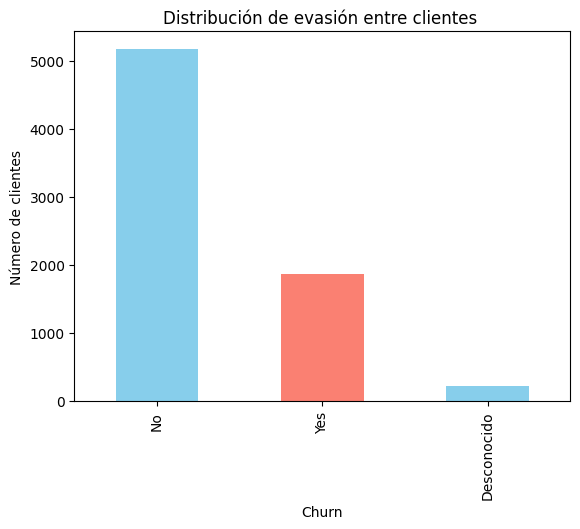

In [48]:
#graficas de la dsitribucion de evasion
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribución de evasión entre clientes ")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()


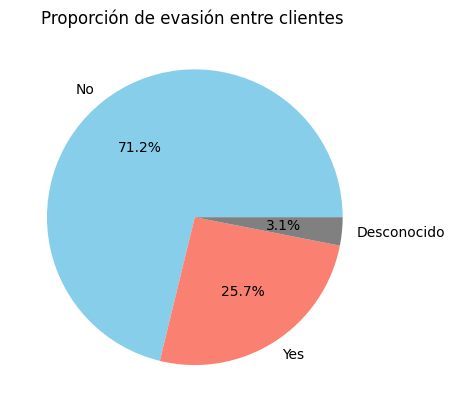

In [50]:
df["Churn"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "salmon","grey"])
plt.title("Proporción de evasión entre clientes ")
plt.ylabel("")  # oculta etiqueta extra
plt.show()


In [51]:
#Recuento de evasion or variable catergorica
#genero
tabla_genero=pd.crosstab(df["gender"], df["Churn"])
tabla_genero

Churn,Desconocido,No,Yes
gender,,,
Female,104,2549,939
Male,120,2625,930


In [52]:
#metodo de pago
tabla_metodo_pago=pd.crosstab(df["PaymentMethod"],df["Churn"])
tabla_metodo_pago

Churn,Desconocido,No,Yes
PaymentMethod,,,
Bank transfer (automatic),45,1286,258
Credit card (automatic),46,1290,232
Electronic check,80,1294,1071
Mailed check,53,1304,308


In [53]:
#tipo de contrato
tabla_tipo_contrato=pd.crosstab(df["Contract"],df["Churn"])
tabla_tipo_contrato

Churn,Desconocido,No,Yes
Contract,,,
Month-to-month,130,2220,1655
One year,46,1307,166
Two year,48,1647,48


In [54]:
#cargos mensuales
tabla_cargos_mensuales=pd.crosstab(df["Charges.Monthly"],df["Churn"])
tabla_cargos_mensuales

Churn,Desconocido,No,Yes
Charges.Monthly,,,
18.25,0,1,0
18.40,0,1,0
18.55,0,1,0
18.70,0,2,0
18.75,1,1,0
...,...,...,...
118.20,0,1,0
118.35,0,0,1
118.60,0,2,0


In [55]:
#meses de contrato
tabla_meses_contrato=pd.crosstab(df["tenure"],df["Churn"])
tabla_meses_contrato

Churn,Desconocido,No,Yes
tenure,,,
0,0,11,0
1,21,233,380
2,8,115,123
3,7,106,94
4,9,93,83
...,...,...,...
68,4,91,9
69,5,87,8
70,3,108,11


In [56]:
#clientes mayores
tabla_clientes_mayores=pd.crosstab(df["SeniorCitizen"],df["Churn"])
tabla_clientes_mayores

Churn,Desconocido,No,Yes
SeniorCitizen,,,
0,184,4508,1393
1,40,666,476


In [58]:
#clientes con dependientes
tabla_clientes_con_dependientes=pd.crosstab(df["Dependents"],df["Churn"])
tabla_clientes_con_dependientes


Churn,Desconocido,No,Yes
Dependents,,,
No,153,3390,1543
Yes,71,1784,326


In [59]:
#tabla clientes con pareja
tabla_clientes_con_pareja=pd.crosstab(df["Partner"],df["Churn"])
tabla_clientes_con_pareja

Churn,Desconocido,No,Yes
Partner,,,
No,108,2441,1200
Yes,116,2733,669


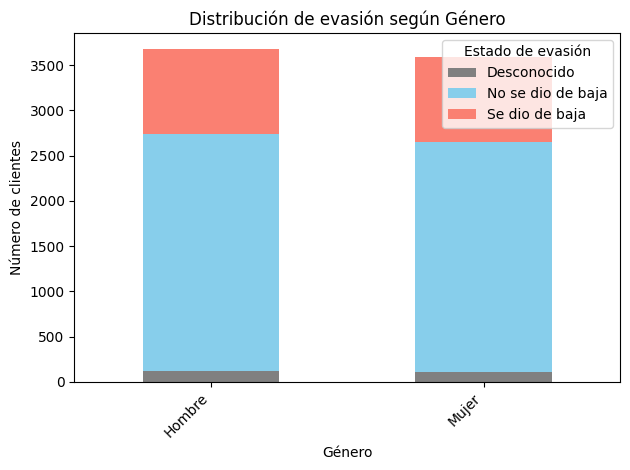

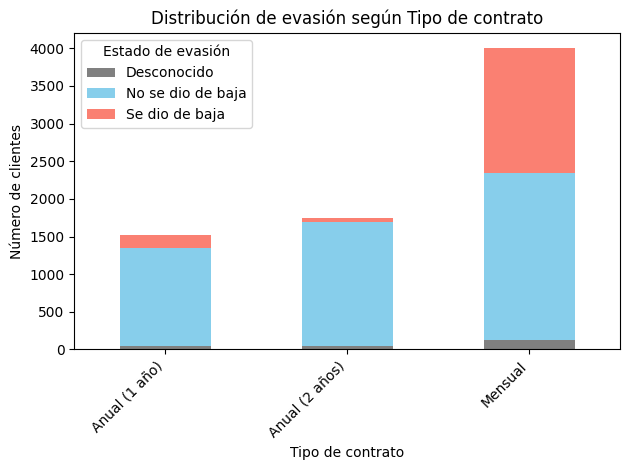

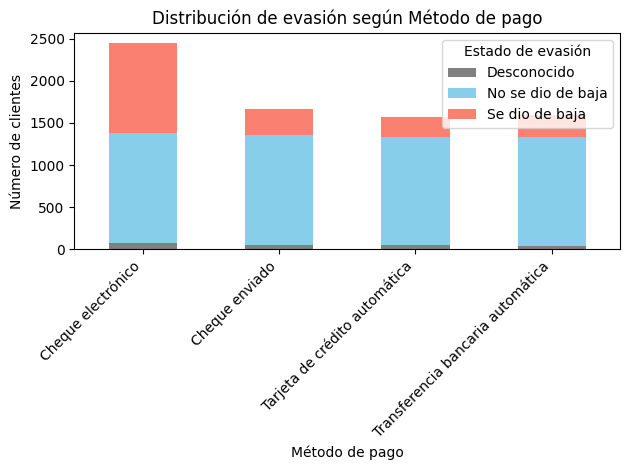

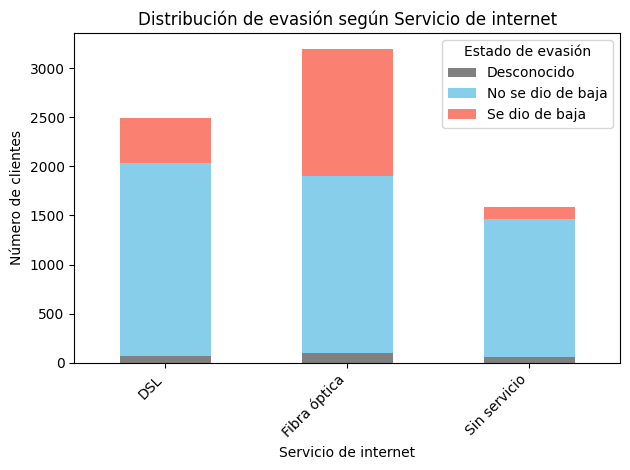

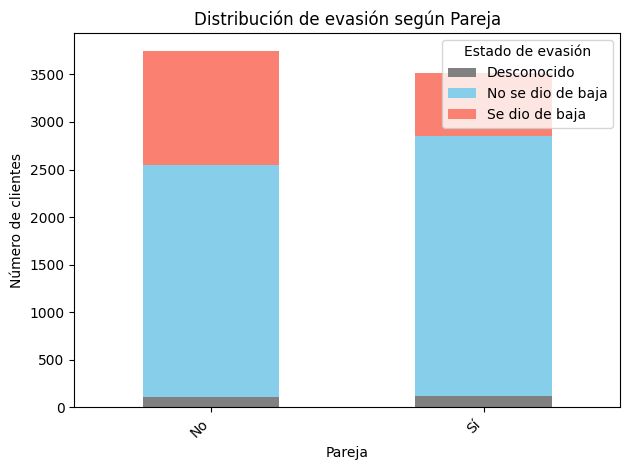

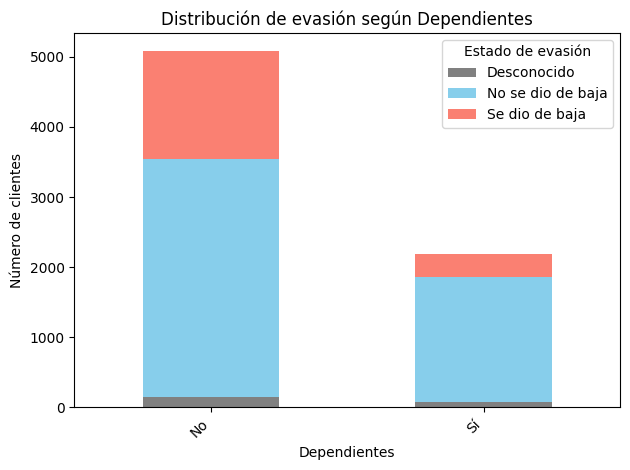

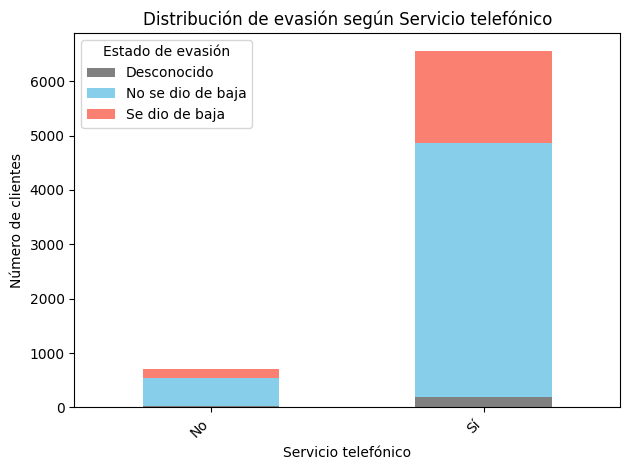

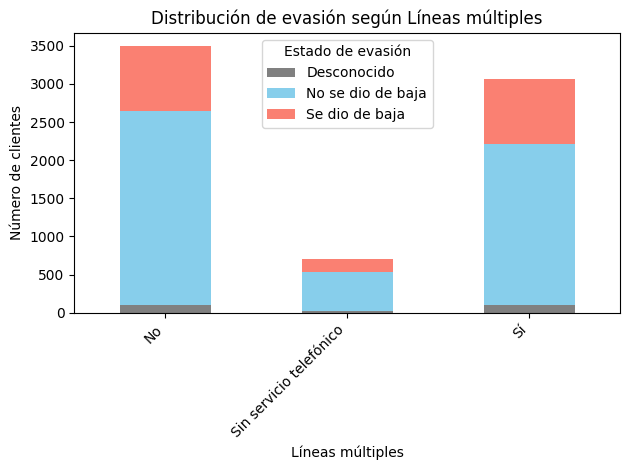

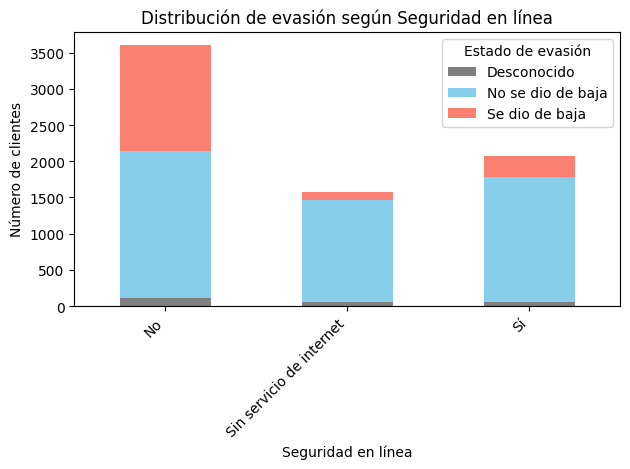

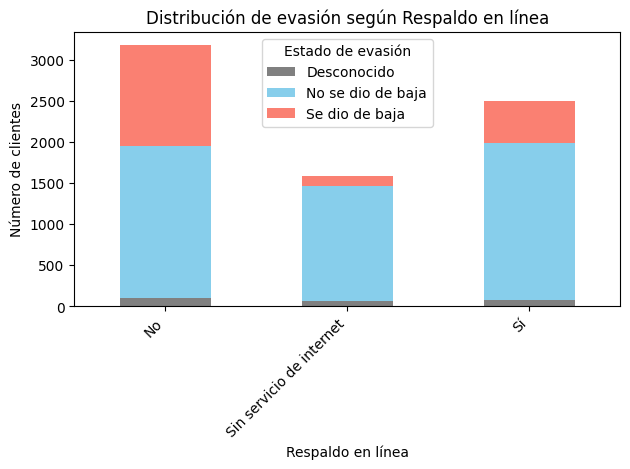

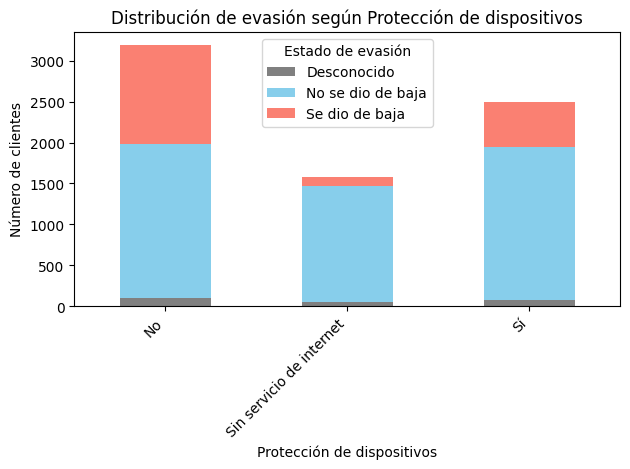

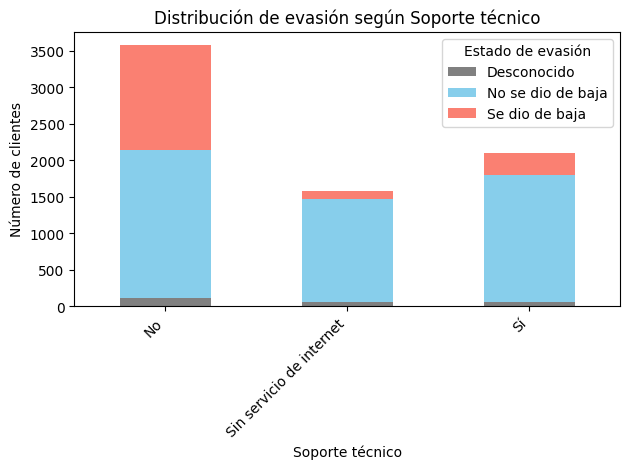

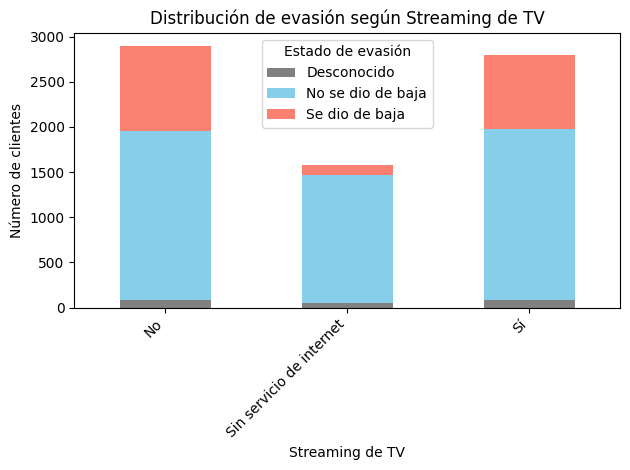

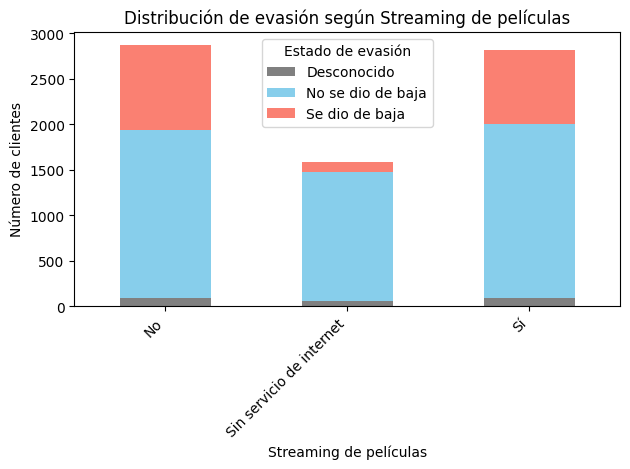

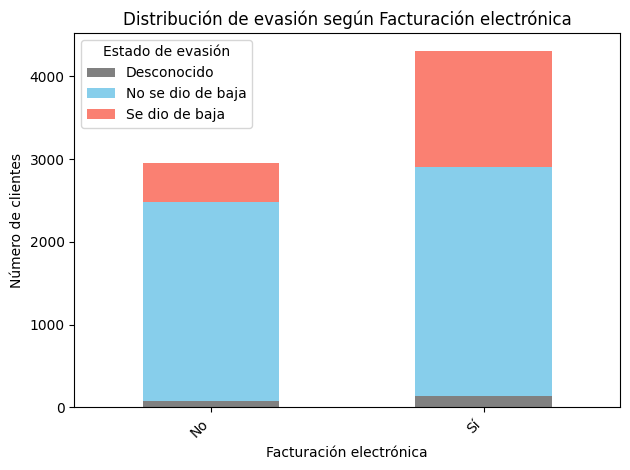

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Limpieza de valores vacíos en Churn
df["Churn"] = df["Churn"].astype(str).str.strip().replace("", "Desconocido")

# Diccionario de traducción para variables (nombres de columnas)
var_labels = {
    "gender": "Género",
    "Contract": "Tipo de contrato",
    "PaymentMethod": "Método de pago",
    "InternetService": "Servicio de internet",
    "Partner": "Pareja",
    "Dependents": "Dependientes",
    "PhoneService": "Servicio telefónico",
    "MultipleLines": "Líneas múltiples",
    "OnlineSecurity": "Seguridad en línea",
    "OnlineBackup": "Respaldo en línea",
    "DeviceProtection": "Protección de dispositivos",
    "TechSupport": "Soporte técnico",
    "StreamingTV": "Streaming de TV",
    "StreamingMovies": "Streaming de películas",
    "PaperlessBilling": "Facturación electrónica"
}

# Diccionario de traducción para valores de Churn
churn_labels = {
    "No": "No se dio de baja",
    "Yes": "Se dio de baja",
    "Desconocido": "Desconocido"
}

# Diccionarios de traducción para valores de variables categóricas
value_labels = {
    "gender": {"Male": "Hombre", "Female": "Mujer"},
    "Contract": {
        "Month-to-month": "Mensual",
        "One year": "Anual (1 año)",
        "Two year": "Anual (2 años)"
    },
    "PaymentMethod": {
        "Electronic check": "Cheque electrónico",
        "Mailed check": "Cheque enviado",
        "Bank transfer (automatic)": "Transferencia bancaria automática",
        "Credit card (automatic)": "Tarjeta de crédito automática"
    },
    "InternetService": {
        "DSL": "DSL",
        "Fiber optic": "Fibra óptica",
        "No": "Sin servicio"
    },
    "Partner": {"Yes": "Sí", "No": "No"},
    "Dependents": {"Yes": "Sí", "No": "No"},
    "PhoneService": {"Yes": "Sí", "No": "No"},
    "MultipleLines": {
        "Yes": "Sí",
        "No": "No",
        "No phone service": "Sin servicio telefónico"
    },
    "OnlineSecurity": {
        "Yes": "Sí",
        "No": "No",
        "No internet service": "Sin servicio de internet"
    },
    "OnlineBackup": {
        "Yes": "Sí",
        "No": "No",
        "No internet service": "Sin servicio de internet"
    },
    "DeviceProtection": {
        "Yes": "Sí",
        "No": "No",
        "No internet service": "Sin servicio de internet"
    },
    "TechSupport": {
        "Yes": "Sí",
        "No": "No",
        "No internet service": "Sin servicio de internet"
    },
    "StreamingTV": {
        "Yes": "Sí",
        "No": "No",
        "No internet service": "Sin servicio de internet"
    },
    "StreamingMovies": {
        "Yes": "Sí",
        "No": "No",
        "No internet service": "Sin servicio de internet"
    },
    "PaperlessBilling": {"Yes": "Sí", "No": "No"}
}

# Colores personalizados
churn_colors = {
    "No se dio de baja": "skyblue",
    "Se dio de baja": "salmon",
    "Desconocido": "gray"
}

# Variables categóricas a analizar
categorical_vars = list(var_labels.keys())

# Generar gráficos
for var in categorical_vars:
    if var in df.columns:
        # Traducir valores de la variable si existe diccionario
        if var in value_labels:
            df[var] = df[var].replace(value_labels[var])

        # Traducir valores de Churn
        df["Churn_trad"] = df["Churn"].replace(churn_labels)

        # Tabla de contingencia
        crosstab = pd.crosstab(df[var], df["Churn_trad"])
        if not crosstab.empty:
            # Graficar con colores traducidos
            crosstab.plot(
                kind="bar",
                stacked=True,
                color=[churn_colors.get(col, "gray") for col in crosstab.columns]
            )
            plt.title(f"Distribución de evasión según {var_labels.get(var, var)}")
            plt.xlabel(var_labels.get(var, var))   # Etiqueta en español
            plt.ylabel("Número de clientes")
            plt.xticks(rotation=45, ha="right")
            plt.legend(title="Estado de evasión")  # Leyenda en español
            plt.tight_layout()
            plt.show()


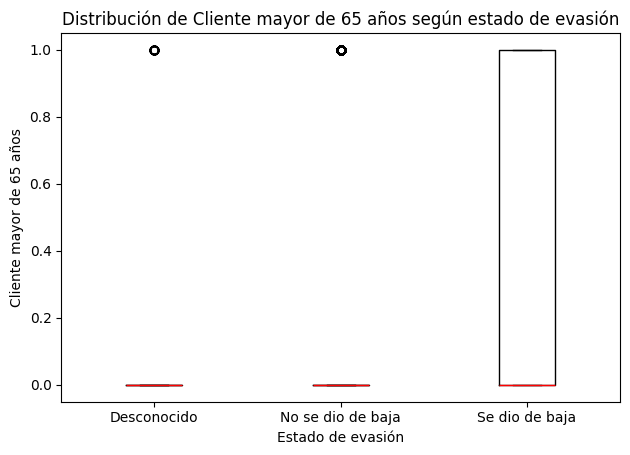

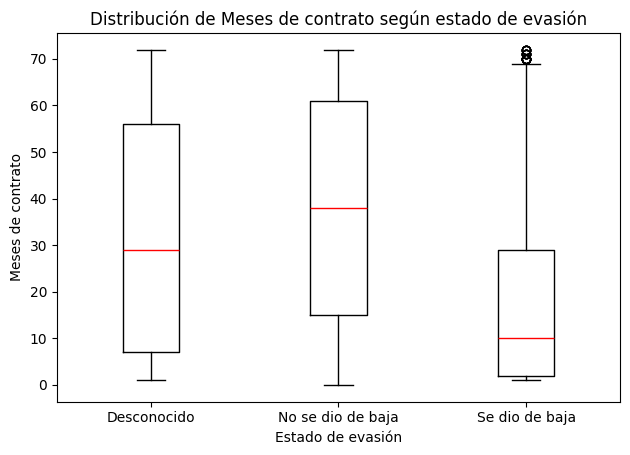

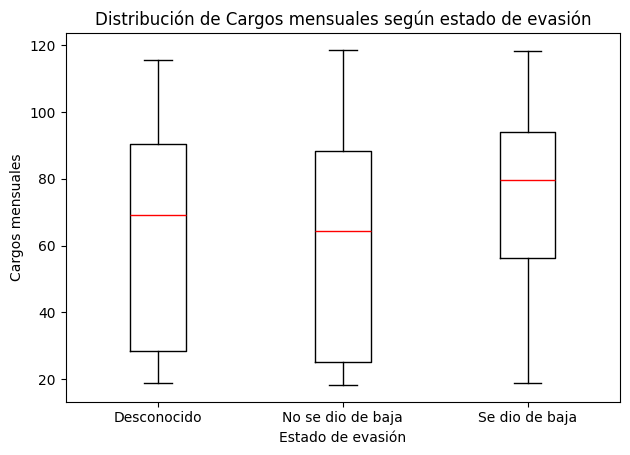

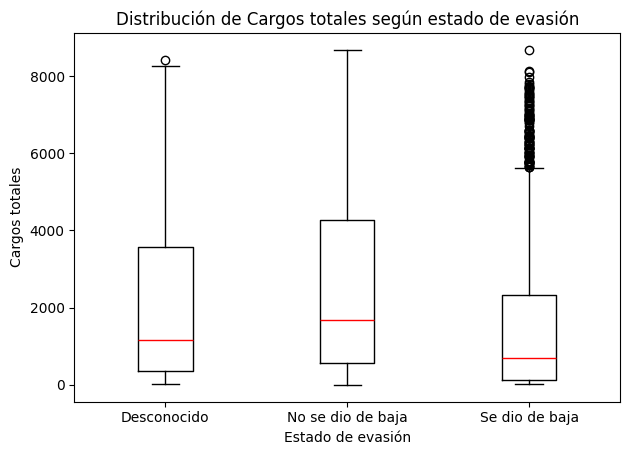

In [70]:
#Distribucion de evasion segun variables numericas
import pandas as pd
import matplotlib.pyplot as plt

# Traducción de nombres de variables numéricas
num_var_labels = {
    "SeniorCitizen": "Cliente mayor de 65 años",
    "tenure": "Meses de contrato",
    "Charges.Monthly": "Cargos mensuales",
    "Charges.Total": "Cargos totales"
}

# Traducción de valores de Churn
churn_labels = {
    "No": "No se dio de baja",
    "Yes": "Se dio de baja",
    "Desconocido": "Desconocido"
}

# Colores personalizados
churn_colors = {
    "No se dio de baja": "skyblue",
    "Se dio de baja": "salmon",
    "Desconocido": "gray"
}

# Crear columna traducida de Churn
df["Churn_trad"] = df["Churn"].replace(churn_labels)

# Variables numéricas a analizar
numeric_vars = list(num_var_labels.keys())

# Generar gráficos
for var in numeric_vars:
    if var in df.columns:
        # Graficar distribución de la variable numérica según Churn
        df.boxplot(column=var, by="Churn_trad", grid=False,
                   color=dict(boxes="black", whiskers="black", medians="red", caps="black"))
        plt.title(f"Distribución de {num_var_labels.get(var, var)} según estado de evasión")
        plt.suptitle("")  # elimina título automático extra
        plt.xlabel("Estado de evasión")
        plt.ylabel(num_var_labels.get(var, var))
        plt.tight_layout()
        plt.show()


#📄Informe final

# 📊 Informe Final – Análisis de Evasión de Clientes (Churn) en TelecomX

---

## 🔹 Introducción
El objetivo de este análisis es comprender el **comportamiento de evasión de clientes (Churn)** en TelecomX. La evasión representa un desafío crítico para la empresa, ya que implica pérdida de ingresos y mayor costo de adquisición de nuevos clientes. Identificar patrones y factores asociados al churn permite diseñar estrategias efectivas de retención.

---

## 🔹 Limpieza y Tratamiento de Datos
Durante la preparación de los datos se realizaron las siguientes acciones:

- **Importación de datos** desde el archivo proporcionado.  
- **Corrección de tipos de datos**:
  - `Charges.Total` convertido de `object` a `float64`.
  - `SeniorCitizen` transformado a variable booleana.  
- **Tratamiento de valores nulos**:
  - Se detectaron 11 registros nulos en `Charges.Total`, imputados con `0` al corresponder a clientes nuevos (tenure = 0).  
- **Normalización de categorías**:
  - Se eliminaron espacios y se reemplazaron valores vacíos en `Churn` por `"Desconocido"`.  
  - Traducción de variables y categorías al español para mejorar la interpretación en gráficos.  

---

## 🔹 Análisis Exploratorio de Datos
Se realizaron diversos análisis para comprender la distribución de churn:

- **Distribución general de evasión**:
  - ~73% de clientes permanecen.
  - ~27% de clientes se dieron de baja.
  - ~4% con estado desconocido.  

- **Gráficos por variables categóricas**:

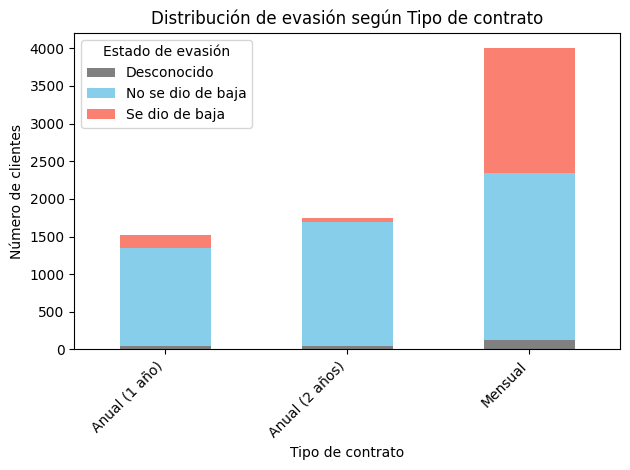

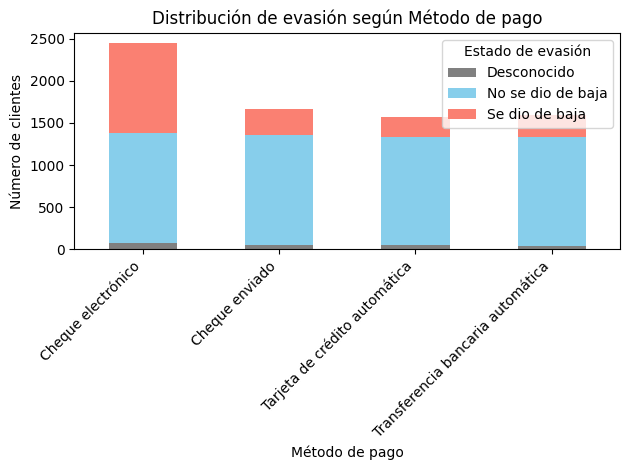

  - **Contrato**: Los clientes con contrato mensual presentan mayor evasión que los de contratos anuales.  
  - **Método de pago**: Los clientes que usan cheque electrónico muestran mayor evasión.  
  - **Servicios adicionales**: La ausencia de servicios como seguridad en línea o soporte técnico está asociada a mayor evasión.  


*Variables numéricas*:

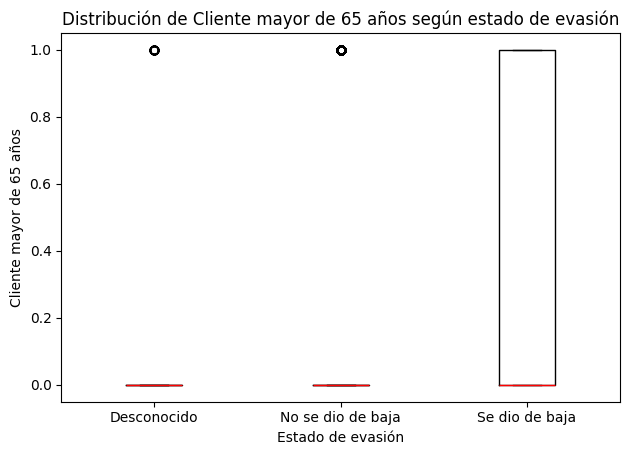

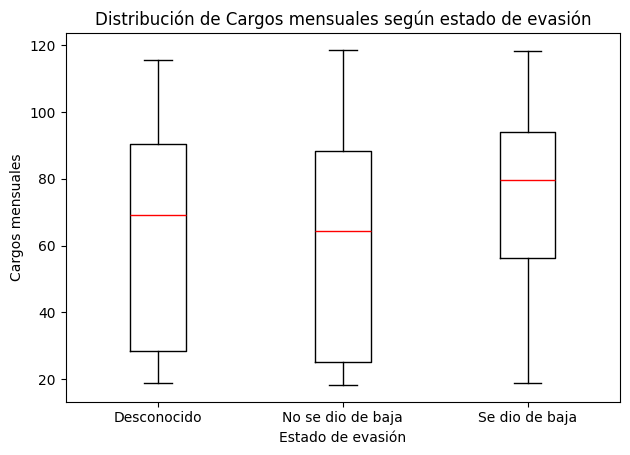

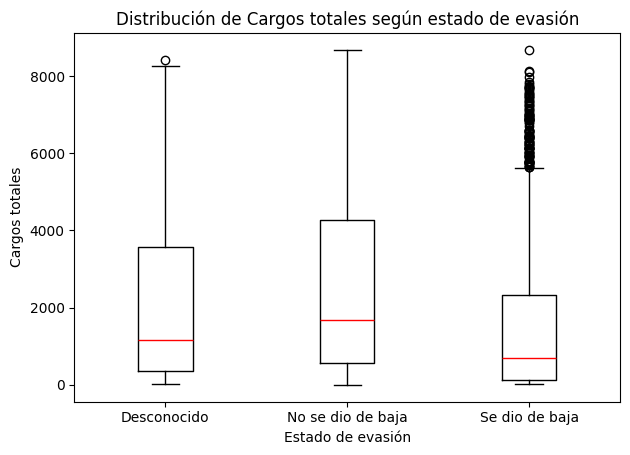

  - **Tenure**: Clientes con menor tiempo de contrato tienen mayor probabilidad de evasión.  
  - **Charges.Monthly**: Los clientes con cargos mensuales más altos tienden a cancelar si no perciben valor.  
  - **Charges.Total**: Clientes con gasto acumulado bajo (nuevos) presentan mayor evasión.  

Se utilizaron **gráficos de barras apiladas y boxplots** para visualizar estas relaciones.

---

## 🔹 Conclusiones e Insights
- La evasión está fuertemente asociada a **contratos mensuales** y **métodos de pago electrónicos**.  
- Los clientes con **bajo tenure** (recién adquiridos) son más propensos a cancelar.  
- La falta de servicios adicionales (seguridad, soporte, respaldo) incrementa la probabilidad de evasión.  
- Los clientes mayores de 65 años no muestran diferencias significativas respecto a la evasión.  

Estos hallazgos permiten identificar **segmentos de riesgo** y orientar acciones de retención.

---

## 🔹 Recomendaciones
1. **Incentivar contratos a largo plazo** mediante descuentos o beneficios adicionales.  
2. **Mejorar la experiencia de pago electrónico**, reduciendo fricciones y ofreciendo alternativas más seguras.  
3. **Promover servicios adicionales** (seguridad, soporte técnico, respaldo) como paquetes de valor para reducir la evasión.  
4. **Diseñar estrategias de onboarding** para clientes nuevos, aumentando su satisfacción en los primeros meses.  
5. **Monitorear continuamente la evasion** con dashboards y modelos predictivos para actuar de forma proactiva.  

---